In [3]:
%pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [1]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

C:\Users\orteg\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\orteg\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\orteg\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("ac_only_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [6]:
df.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [6]:
df.head()

,Unnamed: 0,loan_amnt,title,fico_range_low,fico_range_high,dti,zip_code,addr_state,emp_length,emp_title,funded_amnt,hardship_flag,home_ownership,loan_status,application_type,issue_d,policy_code,Applicant_Result,int_rate
0,0,3600.0,Debt consolidation,675,679,5.91,190xx,PA,10+ years,leadman,3600.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,13.99
1,1,24700.0,Business,715,719,16.06,577xx,SD,10+ years,Engineer,24700.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,11.99
2,2,35000.0,Debt consolidation,785,789,17.06,076xx,NJ,10+ years,Information Systems Officer,35000.0,N,MORTGAGE,Current,Individual,Dec-2015,1,1,14.85
3,3,10400.0,Major purchase,695,699,25.37,174xx,PA,3 years,Contract Specialist,10400.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,22.45
4,4,11950.0,Debt consolidation,690,694,10.20,300xx,GA,4 years,Veterinary Tecnician,11950.0,N,RENT,Fully Paid,Individual,Dec-2015,1,1,13.44


# Note: Results observed until 'End' cell are not used due to results.

In [4]:
df['request_funded'] = df['funded_amnt']/df['loan_amnt']

In [14]:
df.head()

,Unnamed: 0,loan_amnt,title,fico_range_low,fico_range_high,dti,zip_code,addr_state,emp_length,emp_title,funded_amnt,hardship_flag,home_ownership,loan_status,application_type,issue_d,policy_code,Applicant_Result,request_funded
0,0,3600.0,Debt consolidation,675,679,5.91,190xx,PA,10+ years,leadman,3600.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,1.0
1,1,24700.0,Business,715,719,16.06,577xx,SD,10+ years,Engineer,24700.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,1.0
2,2,35000.0,Debt consolidation,785,789,17.06,076xx,NJ,10+ years,Information Systems Officer,35000.0,N,MORTGAGE,Current,Individual,Dec-2015,1,1,1.0
3,3,10400.0,Major purchase,695,699,25.37,174xx,PA,3 years,Contract Specialist,10400.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,1.0
4,4,11950.0,Debt consolidation,690,694,10.20,300xx,GA,4 years,Veterinary Tecnician,11950.0,N,RENT,Fully Paid,Individual,Dec-2015,1,1,1.0


In [15]:
df['request_funded'].value_counts()

1.000000    2070763
0.625000         21
0.700000         14
0.610000         12
0.637500         10
             ...   
0.707812          1
0.760638          1
0.613235          1
0.640476          1
0.633750          1
Name: request_funded, Length: 1252, dtype: int64

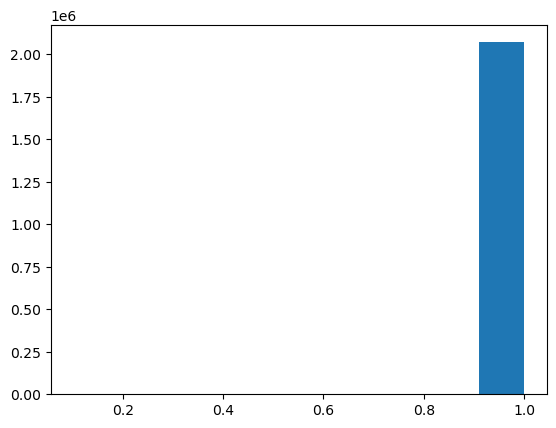

In [25]:
plt.hist(df['request_funded'])
plt.show()

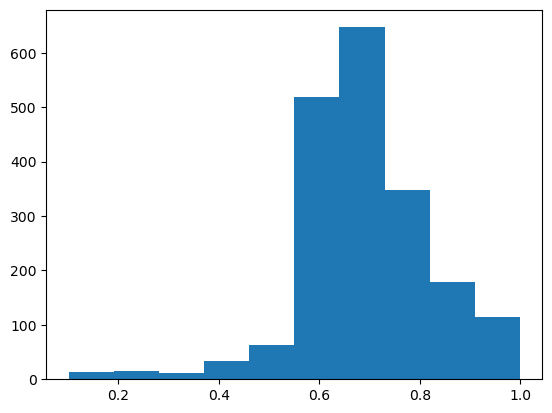

In [26]:
plt.hist(df['request_funded'][df['request_funded']<1])
plt.show()

In [16]:
len(df)

2072705

~2000 people received loans less than what they requested!

In [17]:
df['hardship_flag'].value_counts()

N    2071936
Y        769
Name: hardship_flag, dtype: int64

In [20]:
df['home_ownership'].value_counts()

MORTGAGE    1026198
RENT         828421
OWN          217129
ANY             738
OTHER           174
NONE             45
Name: home_ownership, dtype: int64

In [21]:
df['application_type'].value_counts()

Individual    1971341
Joint App      101364
Name: application_type, dtype: int64

In [5]:
tree_df = df[['application_type', 'home_ownership', 'hardship_flag', 'request_funded']]

In [28]:
tree_df.head()

,application_type,home_ownership,hardship_flag,request_funded
0,Individual,MORTGAGE,N,1.0
1,Individual,MORTGAGE,N,1.0
2,Individual,MORTGAGE,N,1.0
3,Individual,MORTGAGE,N,1.0
4,Individual,RENT,N,1.0


In [29]:
tree_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072705 entries, 0 to 2072704
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   application_type  object 
 1   home_ownership    object 
 2   hardship_flag     object 
 3   request_funded    float64
dtypes: float64(1), object(3)
memory usage: 63.3+ MB


In [6]:
tree_df = pd.get_dummies(tree_df)

In [32]:
tree_df.head()

,request_funded,application_type_Individual,application_type_Joint App,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,hardship_flag_N,hardship_flag_Y
0,1.0,1,0,0,1,0,0,0,0,1,0
1,1.0,1,0,0,1,0,0,0,0,1,0
2,1.0,1,0,0,1,0,0,0,0,1,0
3,1.0,1,0,0,1,0,0,0,0,1,0
4,1.0,1,0,0,0,0,0,0,1,1,0


In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
clf = DecisionTreeRegressor(random_state=42)

In [9]:
data = tree_df.drop('request_funded', axis=1)

In [10]:
clf_test = clf.fit(data, tree_df['request_funded'])

In [11]:
from sklearn import tree

In [20]:
from matplotlib import rcParams # figure size

In [21]:
rcParams['figure.figsize'] = (25, 20)

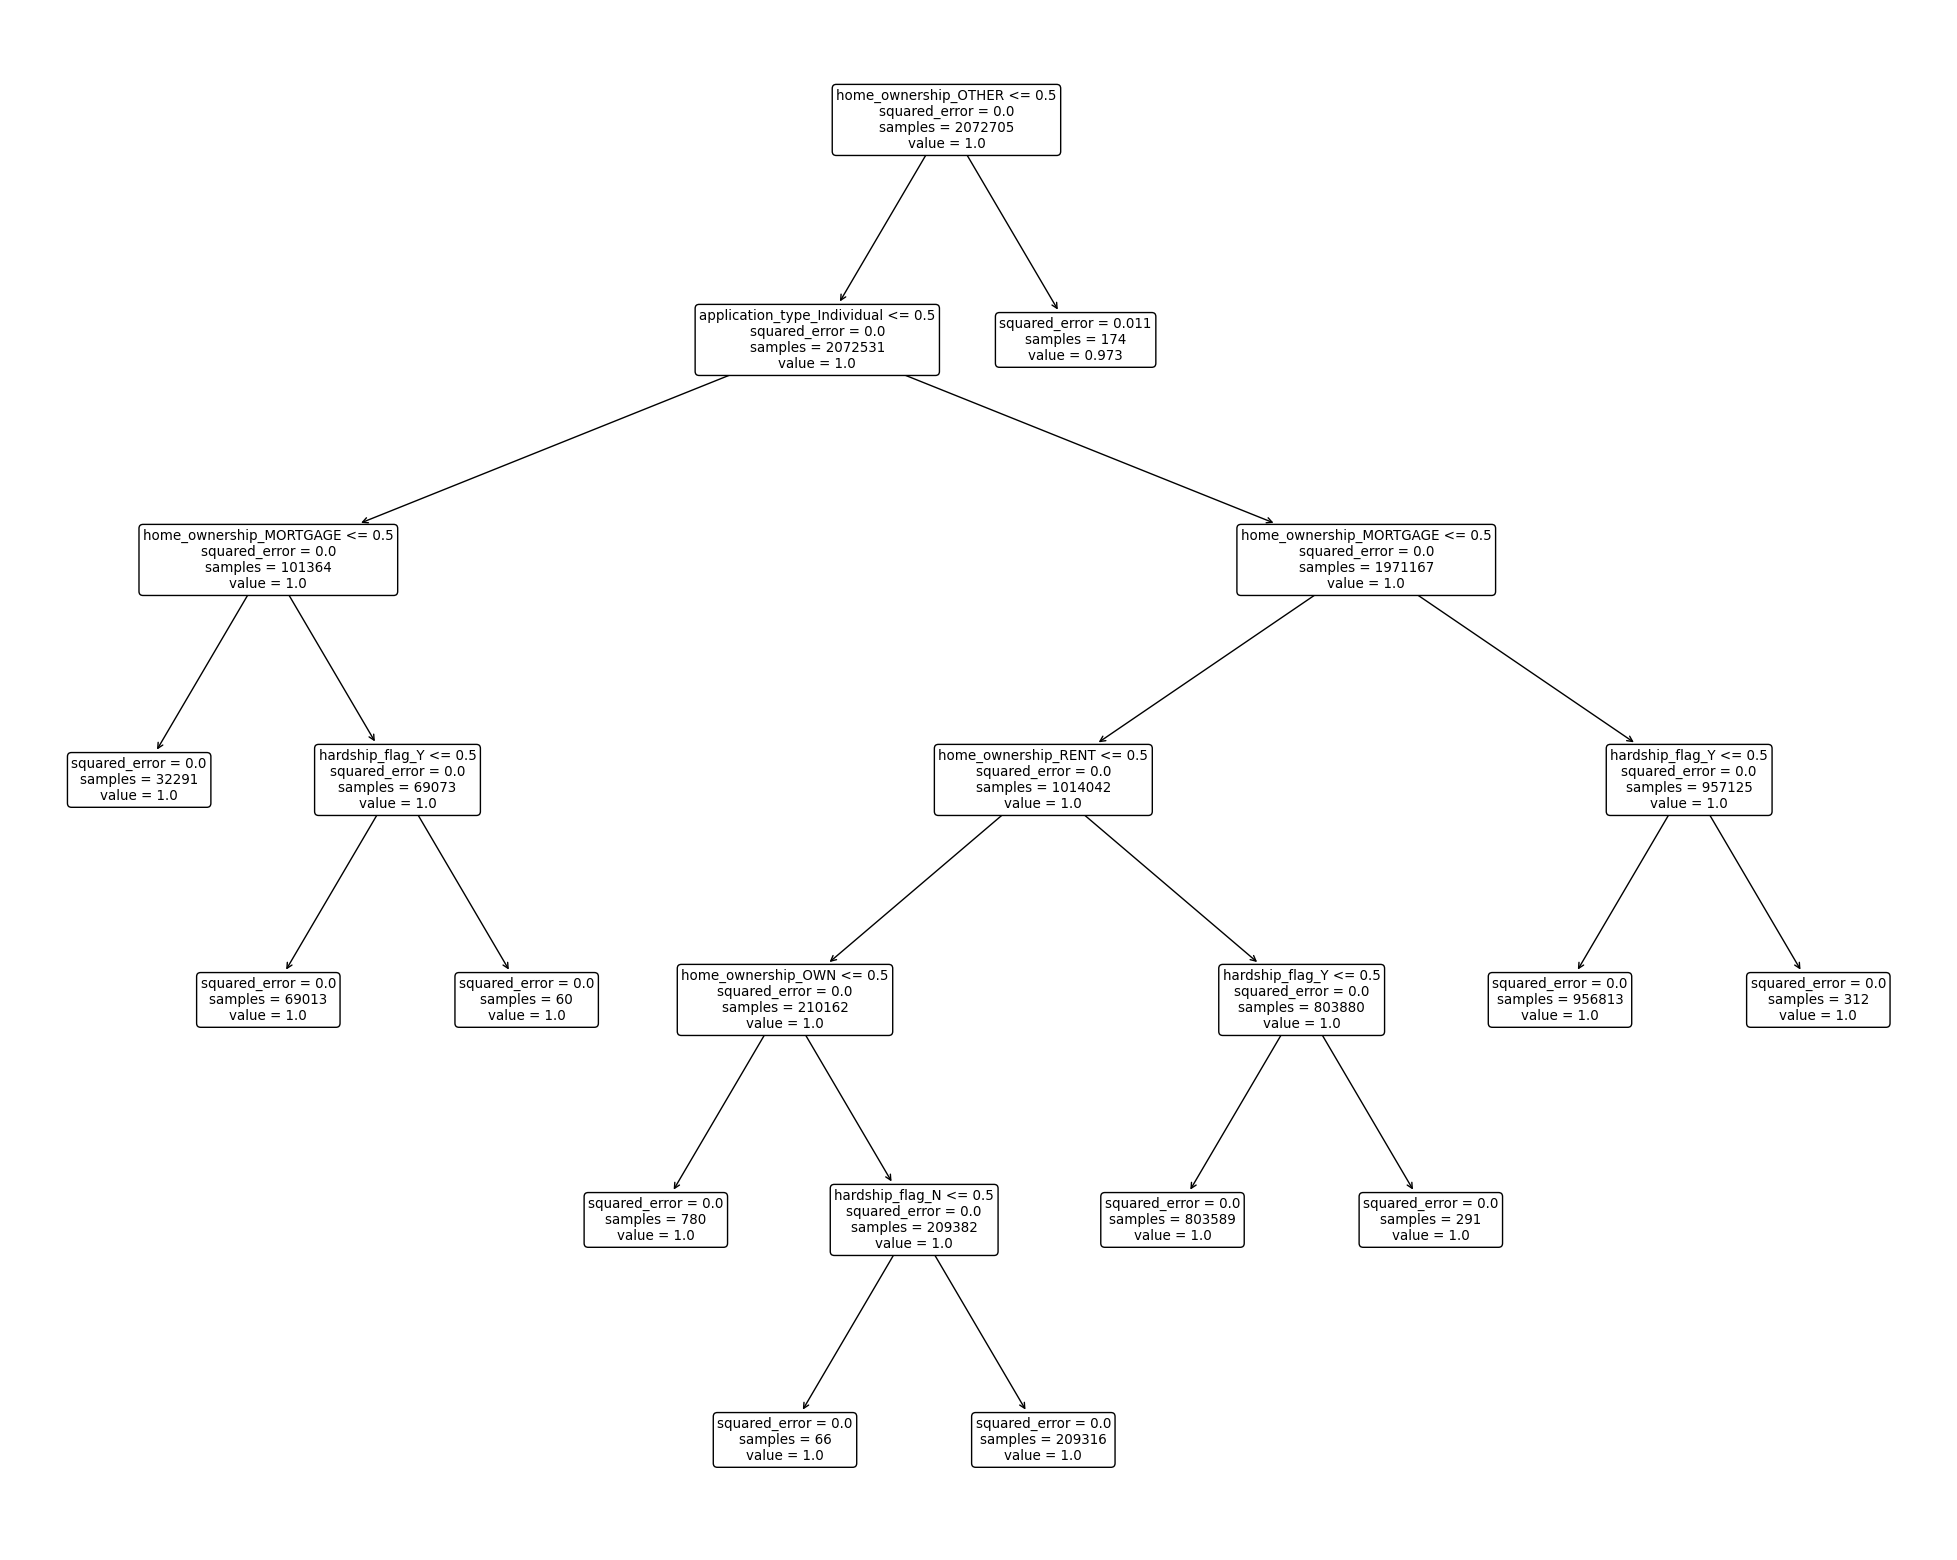

In [22]:
tree.plot_tree(clf_test, 
              feature_names = data.columns, 
              class_names = 'Requested-Funded Ratio', 
              rounded = True)
plt.show()

I will try with dti!

In [38]:
tree_df_dti = df[['application_type', 'home_ownership', 'hardship_flag', 'dti']][df['dti'] <= 100]

In [39]:
tree_df_dti = pd.get_dummies(tree_df_dti)

In [40]:
test_dti = tree_df_dti.drop('dti', axis=1)

In [49]:
rcParams['figure.figsize'] = (35, 30)

In [41]:
clf_test_dti = clf.fit(test_dti, tree_df_dti['dti'])

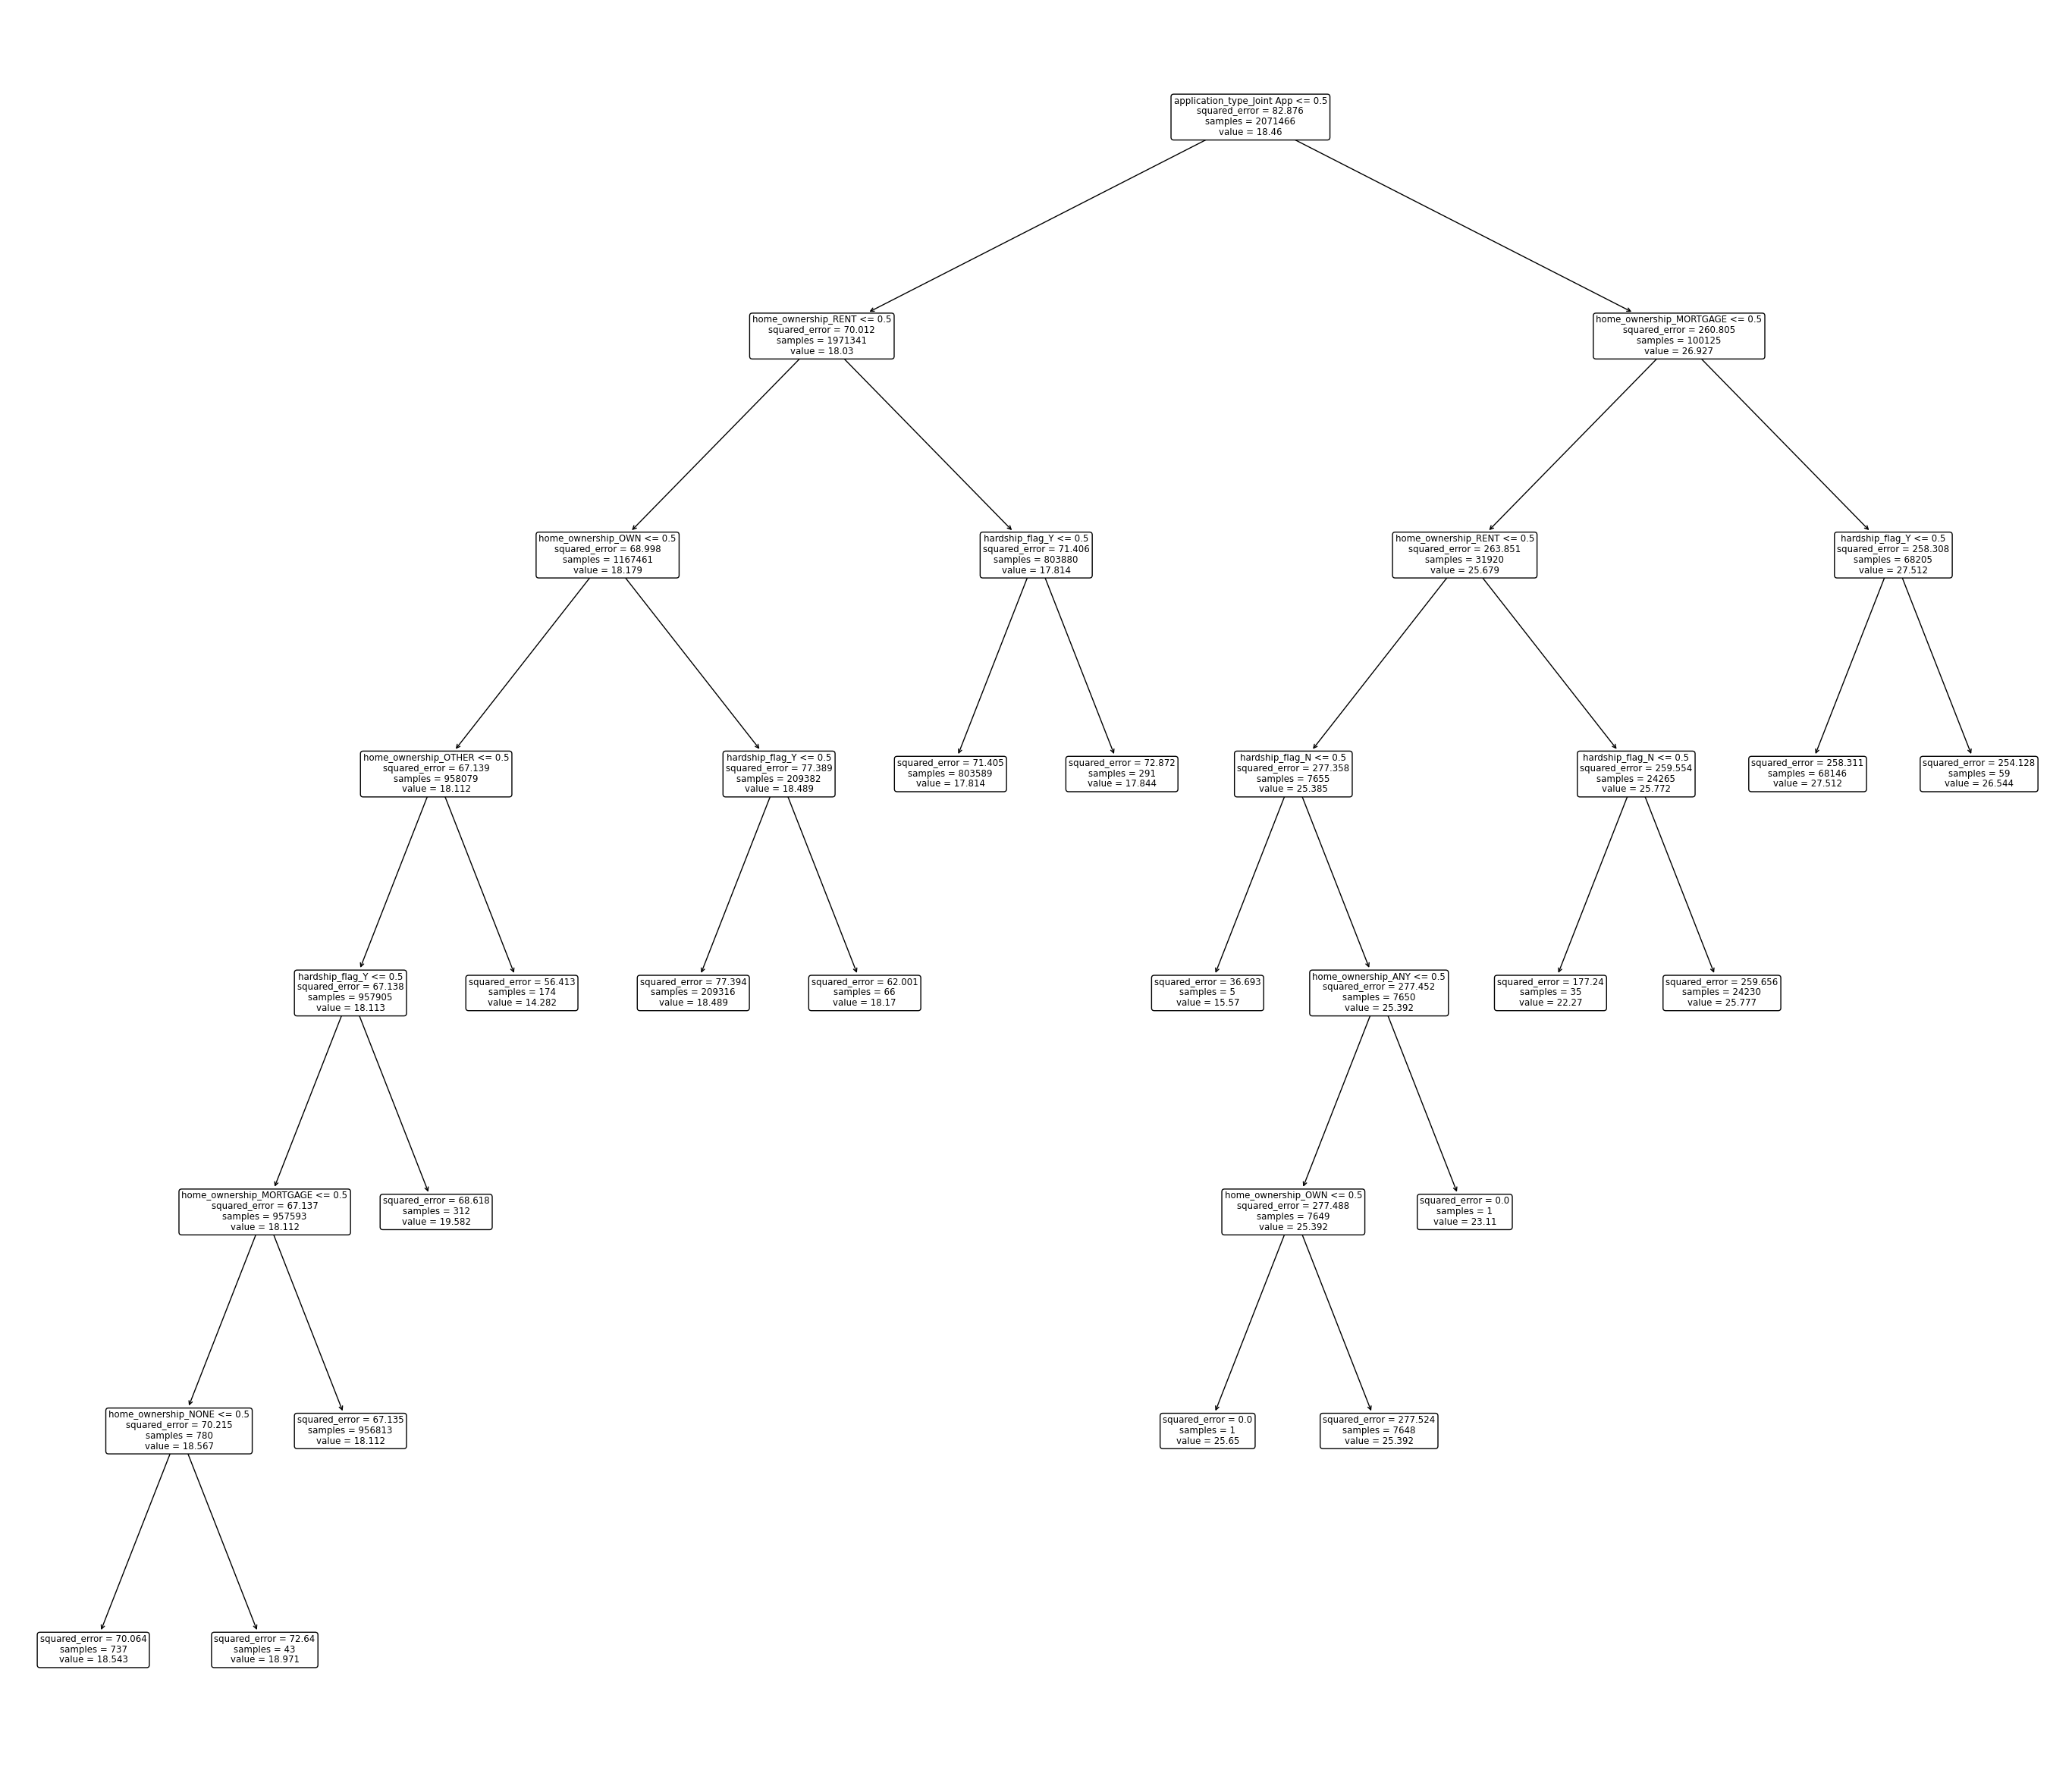

In [50]:
tree.plot_tree(clf_test_dti, 
              feature_names = test_dti.columns, 
              class_names = 'Debt-to-Income Ratio', 
              rounded = True)
plt.show()

Fico Score?

In [64]:
tree_df_fico = df[['application_type', 'home_ownership', 'hardship_flag', 'fico_range_low']]

In [66]:
tree_df_fico['application_type'].value_counts().index

Index(['Individual', 'Joint App'], dtype='object')

In [69]:
tree_df_fico.replace("Individual", "0", inplace=True)
tree_df_fico.replace("Joint App", "1", inplace=True)
tree_df_fico['application_type'] = tree_df_fico['application_type'].astype("int64")

C:\Users\orteg\AppData\Local\Temp\ipykernel_36856\1846677836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df_fico.replace("Individual", "0", inplace=True)
C:\Users\orteg\AppData\Local\Temp\ipykernel_36856\1846677836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df_fico.replace("Joint App", "1", inplace=True)
C:\Users\orteg\AppData\Local\Temp\ipykernel_36856\1846677836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [70]:
tree_df_fico['application_type'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [71]:
tree_df_fico.replace("N", "0", inplace=True)
tree_df_fico.replace("Y", "1", inplace=True)
tree_df_fico['hardship_flag'] = tree_df_fico['hardship_flag'].astype("int64")

C:\Users\orteg\AppData\Local\Temp\ipykernel_36856\3292817832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df_fico.replace("N", "0", inplace=True)
C:\Users\orteg\AppData\Local\Temp\ipykernel_36856\3292817832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df_fico.replace("Y", "1", inplace=True)
C:\Users\orteg\AppData\Local\Temp\ipykernel_36856\3292817832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [73]:
tree_df_fico = pd.get_dummies(tree_df_fico)

In [74]:
tree_df_fico.head()

,application_type,hardship_flag,fico_range_low,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0,0,675,0,1,0,0,0,0
1,0,0,715,0,1,0,0,0,0
2,0,0,785,0,1,0,0,0,0
3,0,0,695,0,1,0,0,0,0
4,0,0,690,0,0,0,0,0,1


In [75]:
test_fico = tree_df_fico.drop('fico_range_low', axis=1)

In [76]:
clf_test_fico = clf.fit(test_fico, tree_df_fico['fico_range_low'])

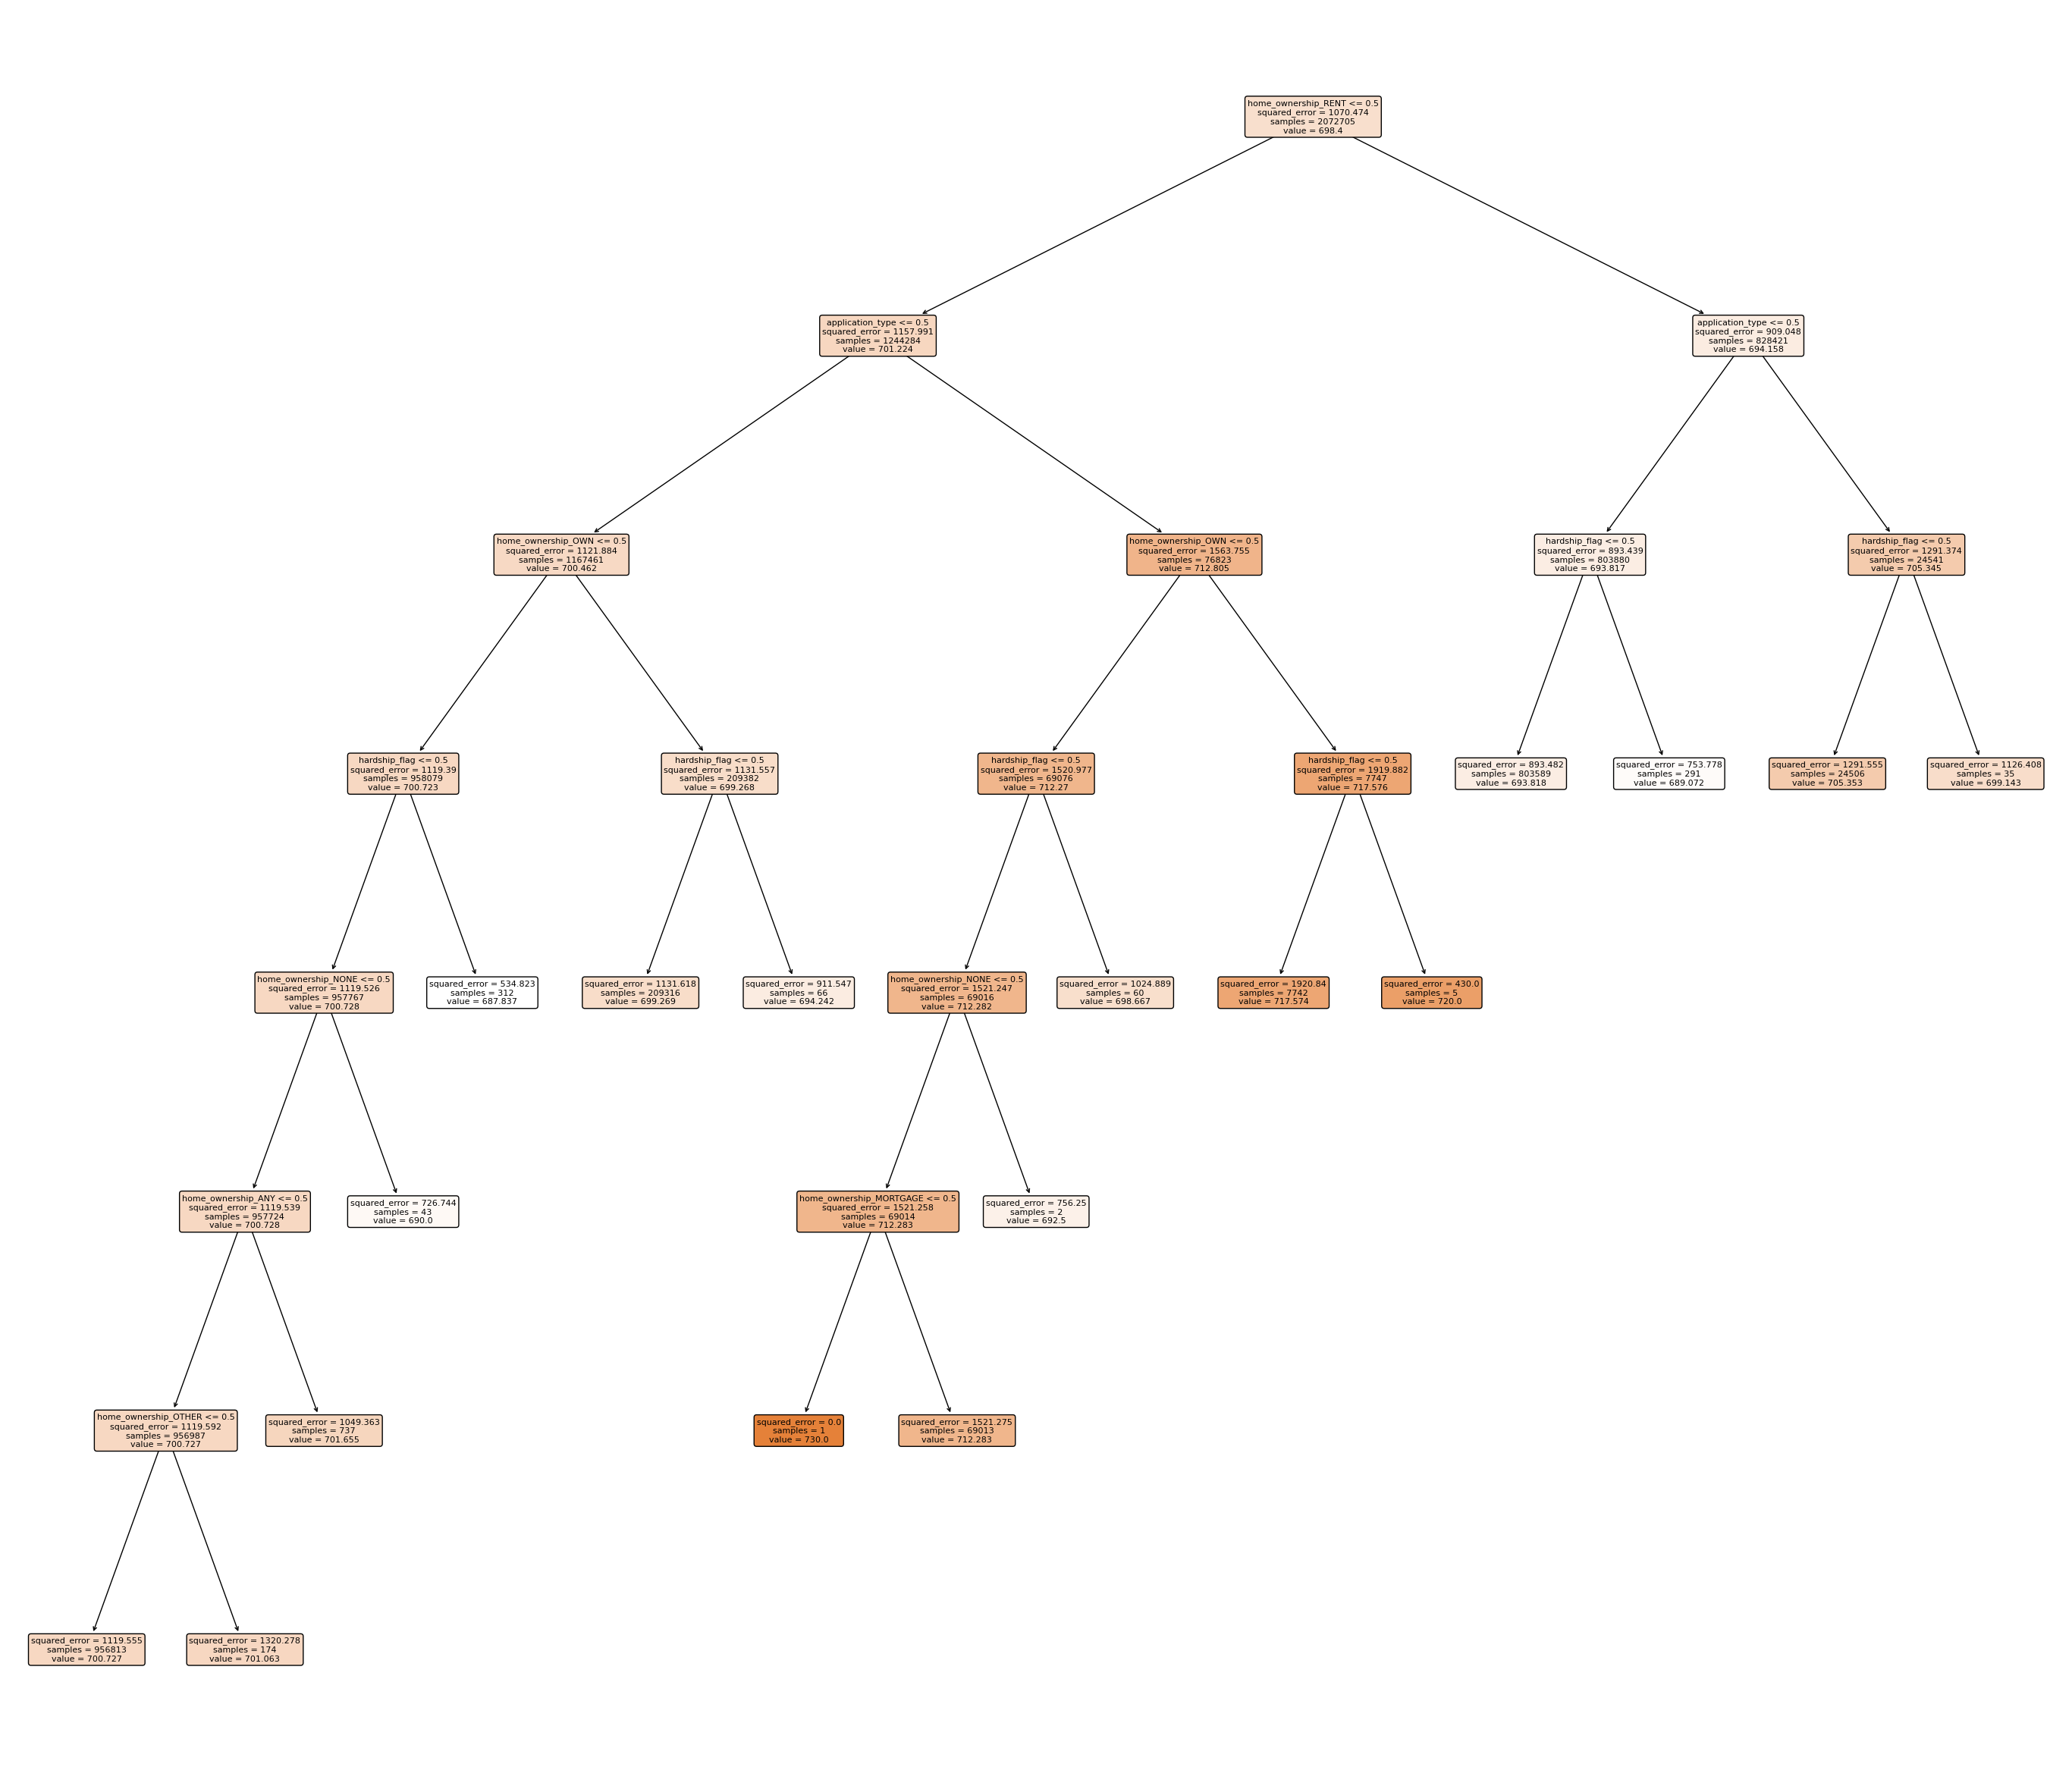

In [77]:
tree.plot_tree(clf_test_fico, 
              feature_names = test_fico.columns, 
              class_names = 'Fico Range Low',
              filled=True,
              fontsize=8, 
              rounded = True)
plt.show()

In [78]:
df['fico_range_low'].describe()

count    2.072705e+06
mean     6.984002e+02
std      3.271810e+01
min      6.100000e+02
25%      6.750000e+02
50%      6.900000e+02
75%      7.150000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64

# End

In [29]:
df.head()

,Unnamed: 0,loan_amnt,title,fico_range_low,fico_range_high,dti,zip_code,addr_state,emp_length,emp_title,funded_amnt,hardship_flag,home_ownership,loan_status,application_type,issue_d,policy_code,Applicant_Result,int_rate
0,0,3600.0,Debt consolidation,675,679,5.91,190xx,PA,10+ years,leadman,3600.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,13.99
1,1,24700.0,Business,715,719,16.06,577xx,SD,10+ years,Engineer,24700.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,11.99
2,2,35000.0,Debt consolidation,785,789,17.06,076xx,NJ,10+ years,Information Systems Officer,35000.0,N,MORTGAGE,Current,Individual,Dec-2015,1,1,14.85
3,3,10400.0,Major purchase,695,699,25.37,174xx,PA,3 years,Contract Specialist,10400.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,22.45
4,4,11950.0,Debt consolidation,690,694,10.20,300xx,GA,4 years,Veterinary Tecnician,11950.0,N,RENT,Fully Paid,Individual,Dec-2015,1,1,13.44


In [39]:
df['home_ownership'].value_counts()

MORTGAGE    1026198
RENT         828421
OWN          217129
ANY             738
OTHER           174
NONE             45
Name: home_ownership, dtype: int64

The any, other, and none categories are very small and make up a small portion of the overall customers. They will not be considered.

In [48]:
df_new = df[~df['home_ownership'].isin(['OTHER', 'ANY', 'NONE'])]

Comparing the new data frame with the original. The difference in the distribution.

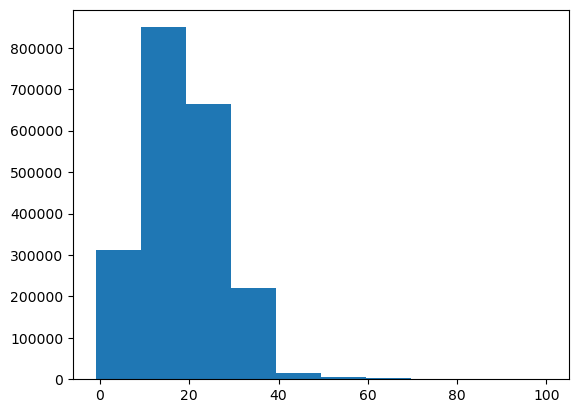

In [49]:
plt.hist(df['dti'][df['dti']<=100])
plt.show()

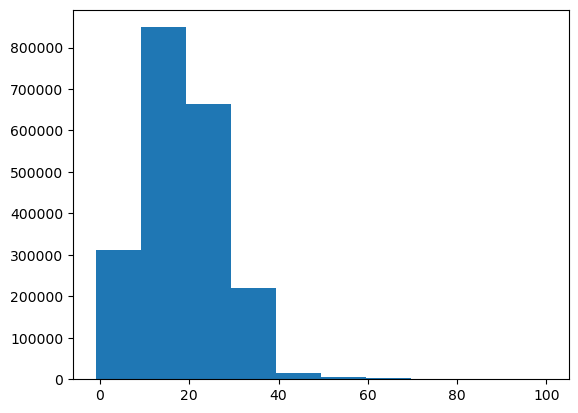

In [50]:
plt.hist(df_new['dti'][df_new['dti']<=100])
plt.show()

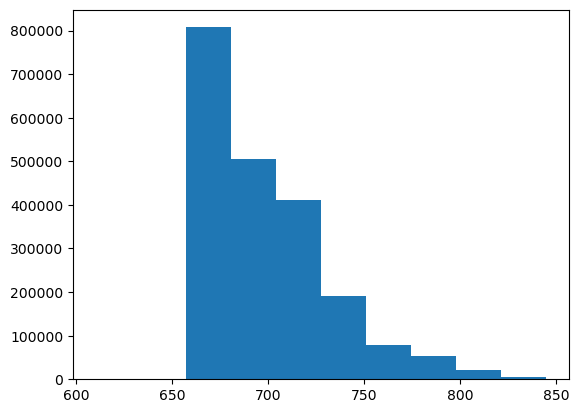

In [19]:
plt.hist(df['fico_range_low'][df['dti']<=100])
plt.show()

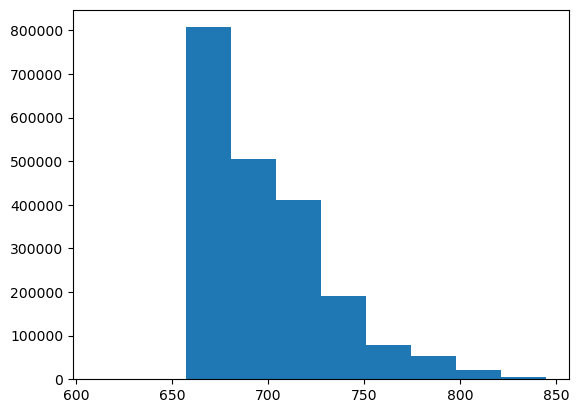

In [51]:
plt.hist(df_new['fico_range_low'][df_new['dti']<=100])
plt.show()

In [79]:
grouped_values = df_new.groupby(['home_ownership', 'application_type', 'hardship_flag'])['fico_range_low'].median()

In [80]:
grouped_values =pd.DataFrame(grouped_values)

In [81]:
grouped_values.reset_index(inplace=True)

In [82]:
grouped_values.sort_values(by='fico_range_low',ascending=False)

,home_ownership,application_type,hardship_flag,fico_range_low
7,OWN,Joint App,Y,720.0
6,OWN,Joint App,N,710.0
2,MORTGAGE,Joint App,N,705.0
3,MORTGAGE,Joint App,Y,700.0
10,RENT,Joint App,N,700.0
0,MORTGAGE,Individual,N,695.0
4,OWN,Individual,N,690.0
11,RENT,Joint App,Y,690.0
1,MORTGAGE,Individual,Y,685.0
5,OWN,Individual,Y,685.0


In [68]:
grouped_values_dti = df_new.groupby(['home_ownership', 'application_type', 'hardship_flag'])['dti'].median()

In [69]:
grouped_values_dti = pd.DataFrame(grouped_values_dti)

In [70]:
grouped_values_dti.reset_index(inplace=True)

In [73]:
grouped_values_dti.sort_values(by='dti', ascending=True)

,home_ownership,application_type,hardship_flag,dti
7,OWN,Joint App,Y,11.900
8,RENT,Individual,N,17.300
9,RENT,Individual,Y,17.490
0,MORTGAGE,Individual,N,17.610
5,OWN,Individual,Y,17.700
4,OWN,Individual,N,18.060
1,MORTGAGE,Individual,Y,19.560
11,RENT,Joint App,Y,20.770
6,OWN,Joint App,N,23.125
10,RENT,Joint App,N,23.535


In [75]:
dti_sort = grouped_values_dti.sort_values(by='dti', ascending=True)

In [78]:
dti_sort.to_csv('dti_sort.csv')

In [83]:
fico_sort = grouped_values.sort_values(by='fico_range_low',ascending=False)

In [84]:
fico_sort.to_csv('fico_sort.csv')